In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
xtrain = []
ytrain = []
for i in range(60, 1258):
    xtrain.append(training_set_scaled[i-60:i, 0])
    ytrain.append(training_set_scaled[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [6]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
regressor = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
# Fitting the RNN to the Training set
regressor.fit(xtrain, ytrain, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0534
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0060
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0065
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 9/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0046
Epoch 12/100
11

1198/1198 [==============================] - 10s 8ms/step - loss: 0.0017
Epoch 94/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0018
Epoch 95/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 100/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015


In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xtest = []
for i in range(60, 80):
    xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [14]:
predicted_stock_price = regressor.predict(xtest)

In [15]:
#transforming the data back to original form
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [16]:
error=0
for i in range(0,len(real_stock_price)):
    error+=abs((real_stock_price[i]-predicted_stock_price[i])/real_stock_price[i]) * 100
print("accuracy=",100-error)

accuracy= [78.82998928]


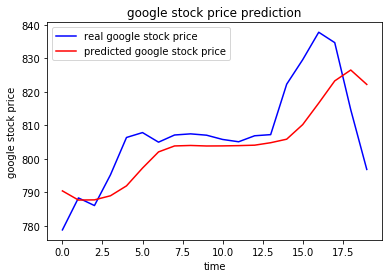

In [17]:
# Visualising the results epoch 100 batch size 32  result 2
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()

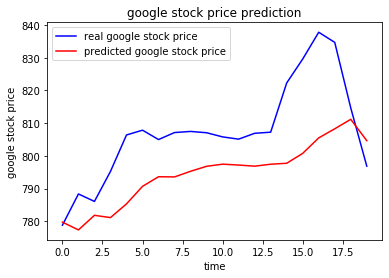

In [97]:
# Visualising the results epoch 400 batch size 32
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()

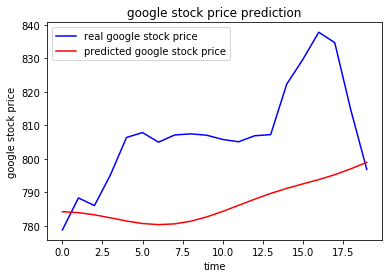

In [48]:
# Visualising the results epoch 10 batch size 8
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()

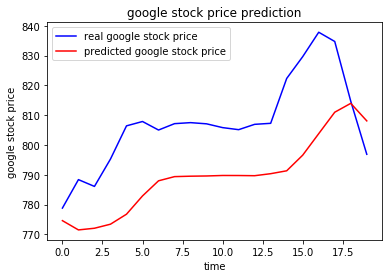

In [39]:
# Visualising the results epoch 200 batch size 64
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()

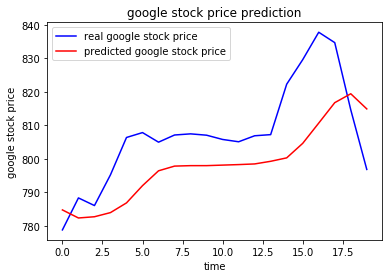

In [34]:
# Visualising the results epoch 100 batch size 32
plt.plot(real_stock_price, color = 'blue', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()